# Import Libraries

In [1]:
import pandas as pd # library for open files
import numpy as np # Library for mathematical operations
import matplotlib.pyplot as plt # Library for graph
import seaborn as sns # Library for graph

from sklearn.model_selection import train_test_split # to split data for training & testing
from sklearn.linear_model import LogisticRegression # to use logistic regression to make classification
from sklearn.metrics import accuracy_score # to get the accuracy score
from sklearn.tree import DecisionTreeClassifier # classification with decision tree

# Load Data

In [2]:
#                              Path                                            File Name  Extension
path = r'D:\Abdulrhman Osama\Machine Learning Projects\HeartOne Classification\heartone.csv'

df = pd.read_csv(path)

print('Data Frame:')
df.head(10) # show the first ten rows from the data

Data Frame:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.shape # Show the number of rows & columns

(303, 14)

In [4]:
df.columns # Show all columns in the data frame

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.isnull().sum() # Check if there any empty slots in the data or any nulls or not

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.info() # Gives information about the data (string, integer, float, etc...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T # describe the data by the minimum, maximum, the number of it, mean, standard deviation, etc...

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Rearrange Data

In [8]:
Injured_Data = df[df['output'].isin([1])]

Not_Injured_Data = df[df['output'].isin([0])]

In [9]:
print('Injured Data:')
Injured_Data

Injured Data:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
print('Not Injured Data:')
Not_Injured_Data

Not Injured Data:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Analysis

In [11]:
Output_Data = df['output'].value_counts()

Output_Data

output
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='output'>

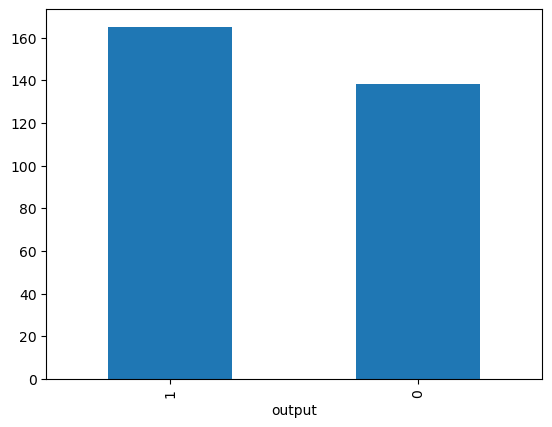

In [12]:
Output_Data.plot(kind = 'bar')

Text(0.5, 1.0, 'Ages:')

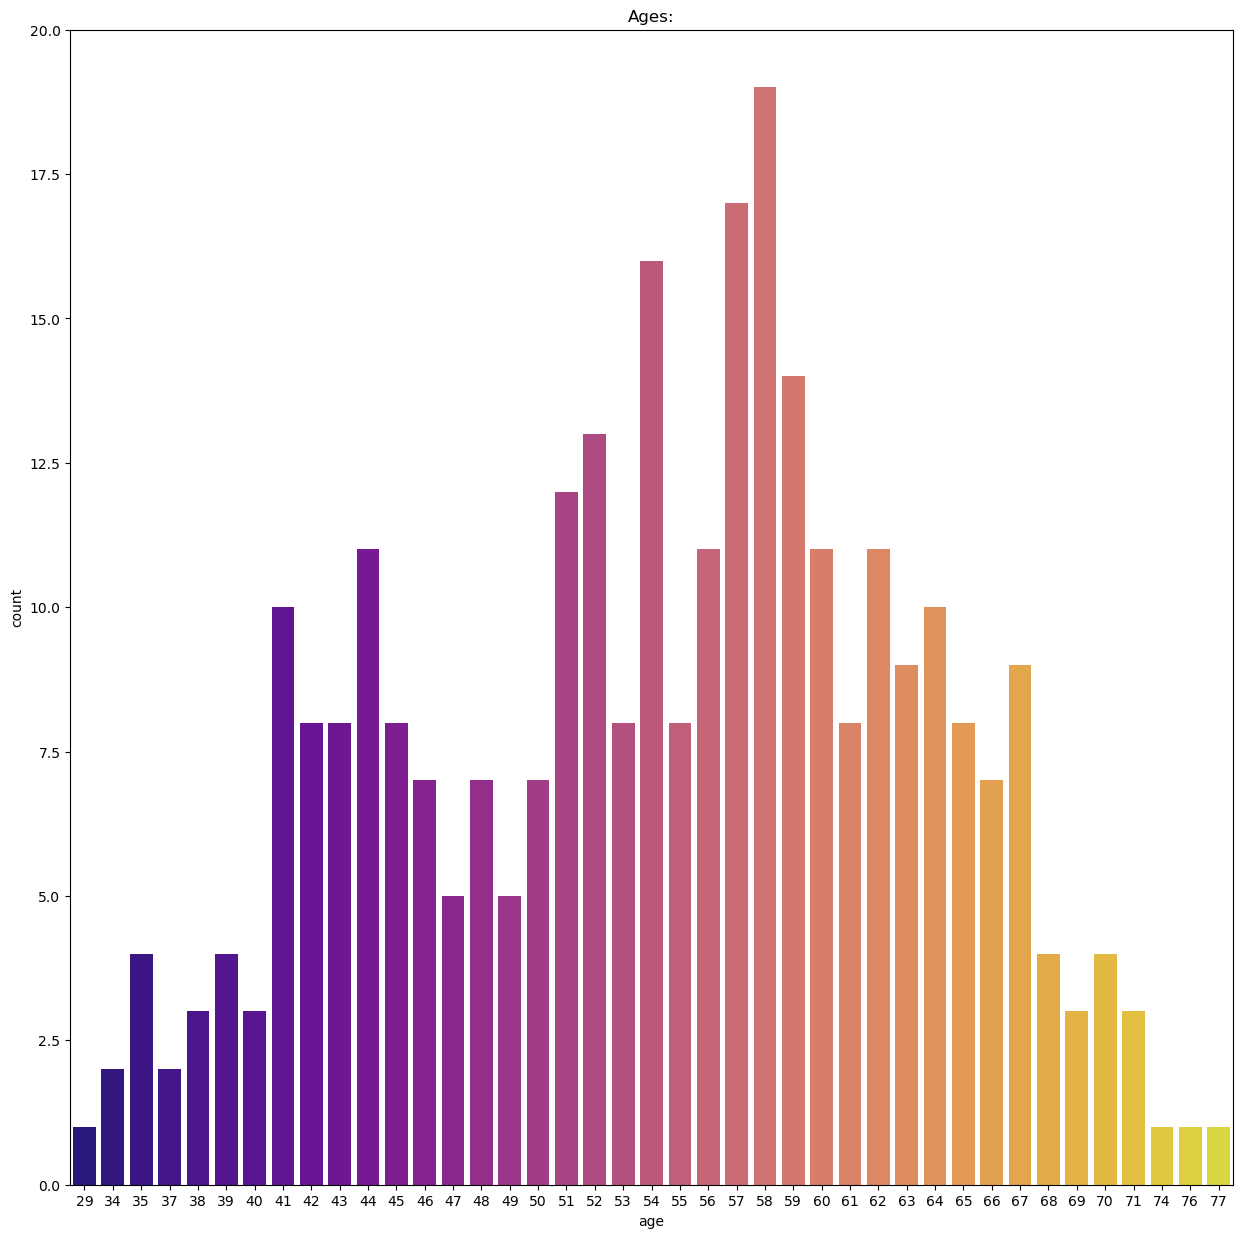

In [13]:
plt.figure(figsize = (15, 15))
sns.countplot(x = 'age', palette = 'plasma', data = df)
plt.ylim(0, 20)
plt.title('Ages:')

In [14]:
Injured_Data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Text(0, 0.5, 'Count')

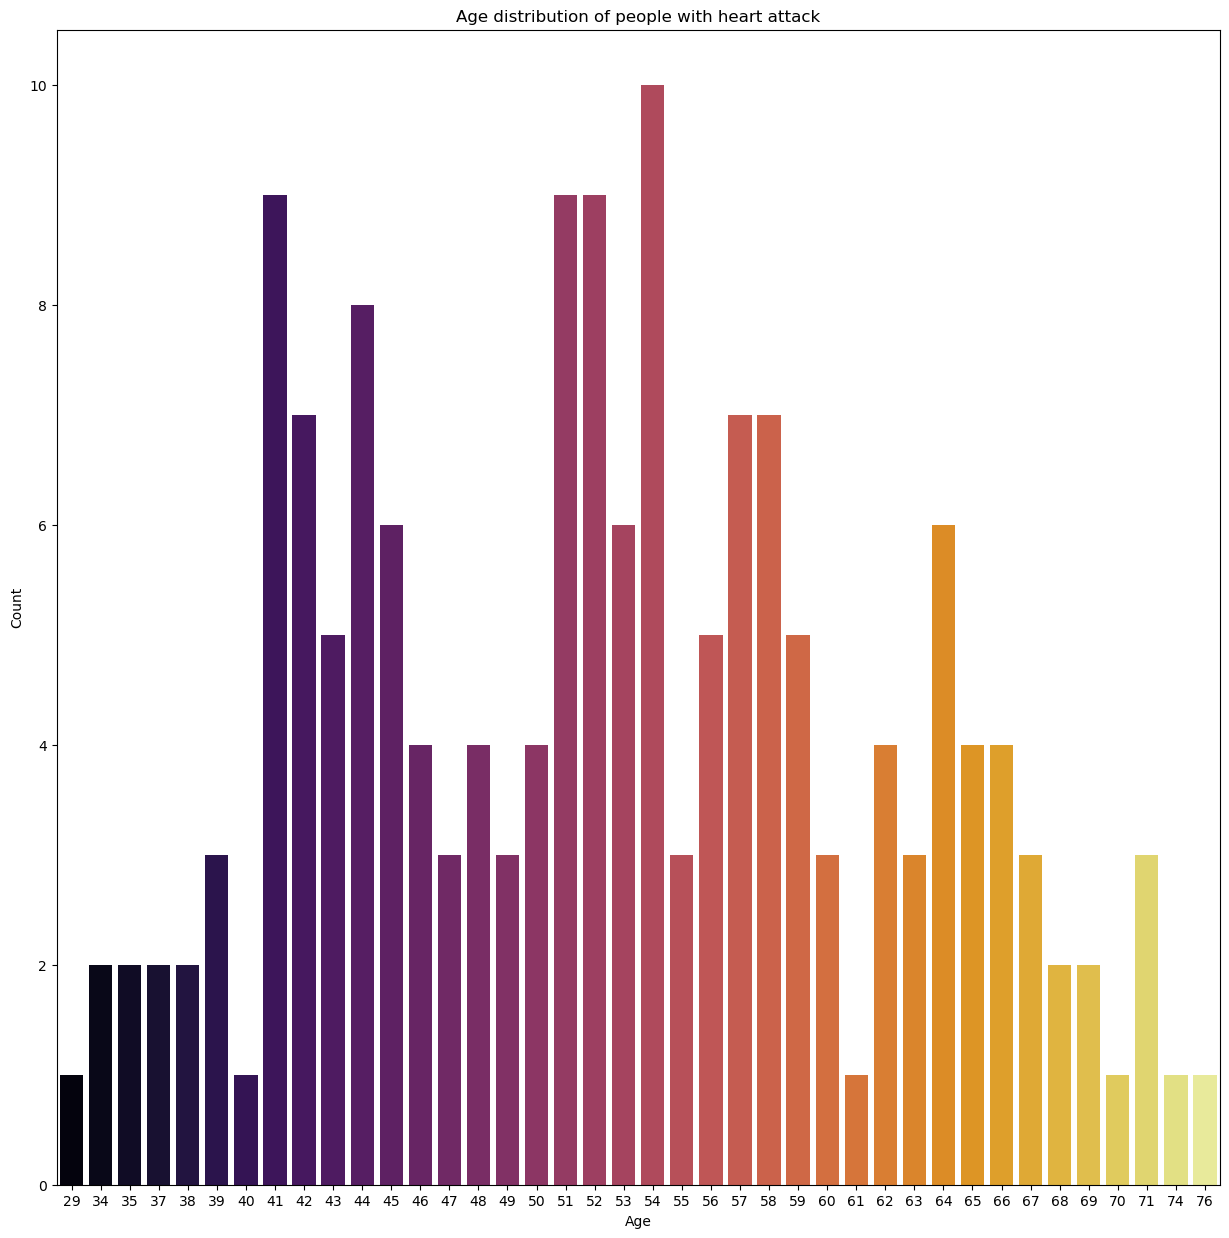

In [15]:
plt.figure(figsize = (15, 15))
sns.countplot(x = 'age', palette = 'inferno', data = Injured_Data)
plt.title('Age distribution of people with heart attack')
plt.xlabel('Age')
plt.ylabel('Count')

In [16]:
Sex_Data = df['sex'].value_counts()

Sex_Data

sex
1    207
0     96
Name: count, dtype: int64

Text(0, 0.5, 'Count')

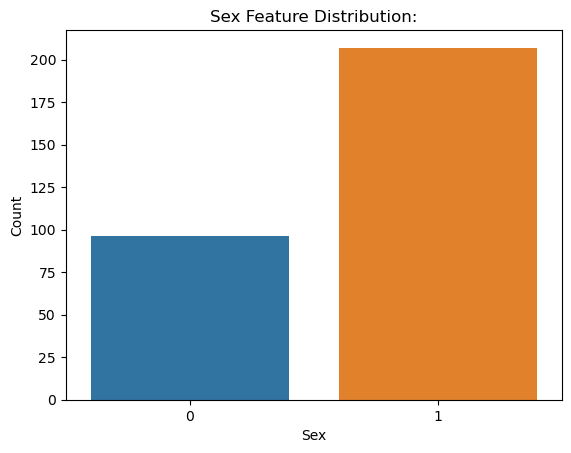

In [17]:
sns.countplot(x = 'sex', data = df)
plt.title('Sex Feature Distribution:')
plt.xlabel('Sex')
plt.ylabel('Count')

In [18]:
Chest_Pain_Data = df['cp'].value_counts()

Chest_Pain_Data

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Chest Pain Types:')

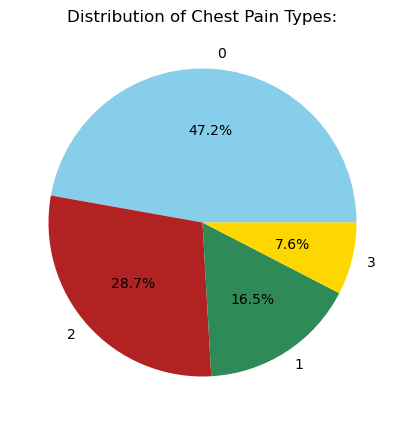

In [19]:
plt.figure(figsize = (5, 5))
colors = ['skyblue', 'firebrick', 'seagreen', 'gold']
plt.pie(Chest_Pain_Data, labels = Chest_Pain_Data.index, autopct = '%1.1f%%', colors = colors)
plt.title('Distribution of Chest Pain Types:')

In [20]:
corr = df.corr()

corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0.5, 1.0, 'Correlation Matrix:')

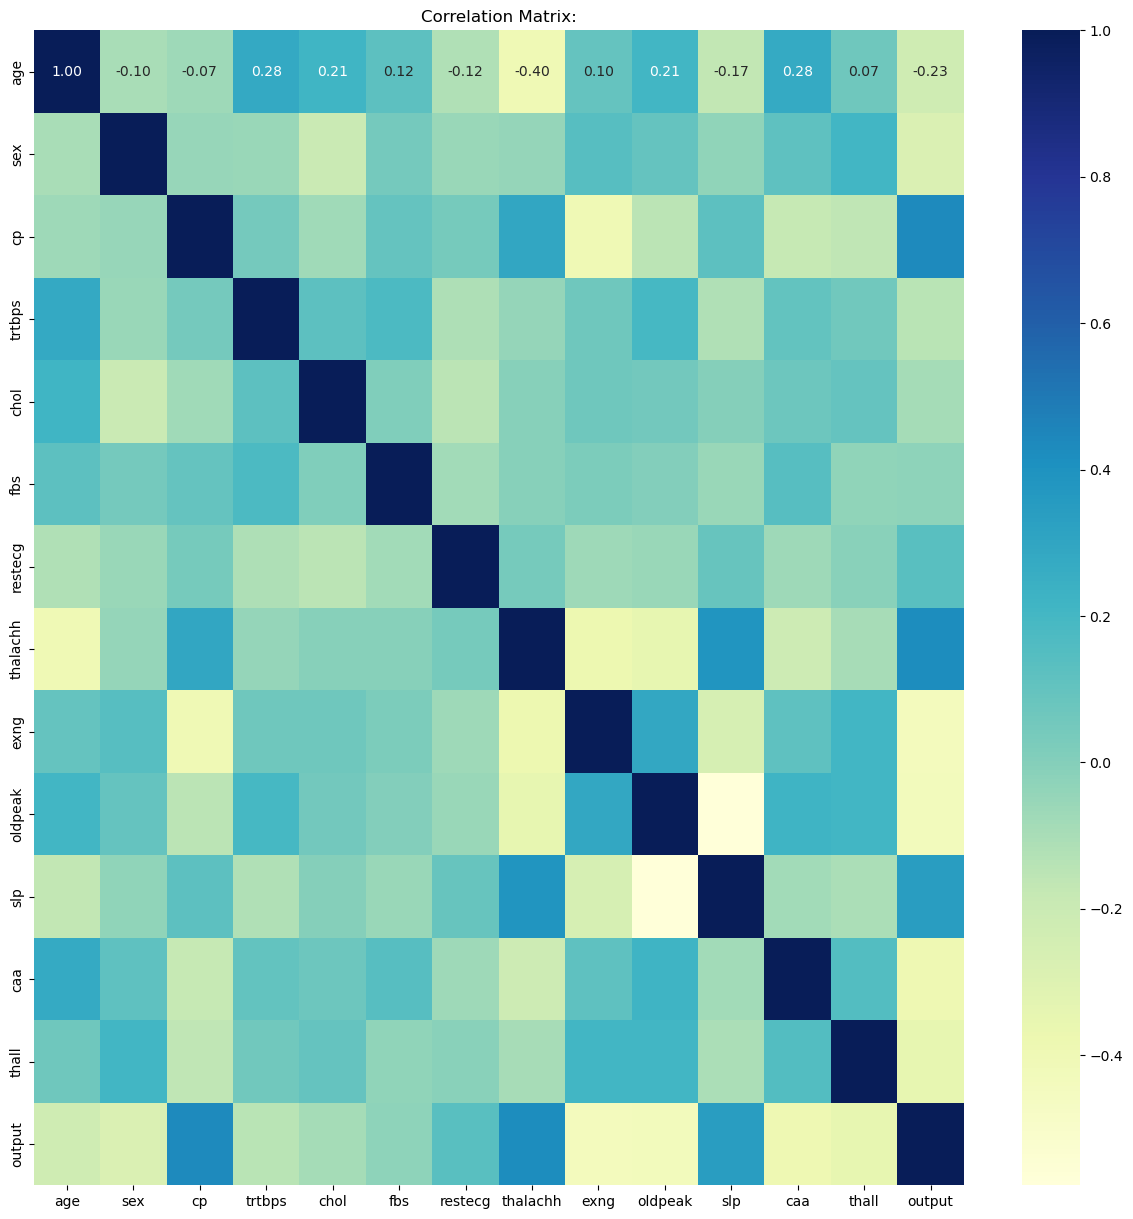

In [21]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr, cmap = 'YlGnBu', annot = True, fmt = '.2f')

plt.title('Correlation Matrix:')

In [22]:
features = df.drop('output', axis = 1)

corrs = [abs(corr[attr]['output']) for attr in list(features)] # Take the absolute value of correlations

lista = list(zip(corrs, list(features))) # Make a list of pairs (corr, features)

print('The absolute of correlations:')
print(corrs)
print()
print('List of pairs (corr, features):')
print(lista)

The absolute of correlations:
[0.22543871587483838, 0.28093657550176676, 0.43379826150689443, 0.14493112849775, 0.08523910513756904, 0.028045760272712952, 0.1372295028737732, 0.4217409338106742, 0.43675708335330315, 0.4306960016873686, 0.34587707824172464, 0.39172399235125244, 0.34402926803830997]

List of pairs (corr, features):
[(0.22543871587483838, 'age'), (0.28093657550176676, 'sex'), (0.43379826150689443, 'cp'), (0.14493112849775, 'trtbps'), (0.08523910513756904, 'chol'), (0.028045760272712952, 'fbs'), (0.1372295028737732, 'restecg'), (0.4217409338106742, 'thalachh'), (0.43675708335330315, 'exng'), (0.4306960016873686, 'oldpeak'), (0.34587707824172464, 'slp'), (0.39172399235125244, 'caa'), (0.34402926803830997, 'thall')]


In [23]:
corrs, labels = list(zip(*lista)) # Unzip pairs of two lists

print('Corrs:')
print(corrs)
print()
print('Labels:')
print(labels)

Corrs:
(0.22543871587483838, 0.28093657550176676, 0.43379826150689443, 0.14493112849775, 0.08523910513756904, 0.028045760272712952, 0.1372295028737732, 0.4217409338106742, 0.43675708335330315, 0.4306960016873686, 0.34587707824172464, 0.39172399235125244, 0.34402926803830997)

Labels:
('age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall')


(0.0, 0.5)

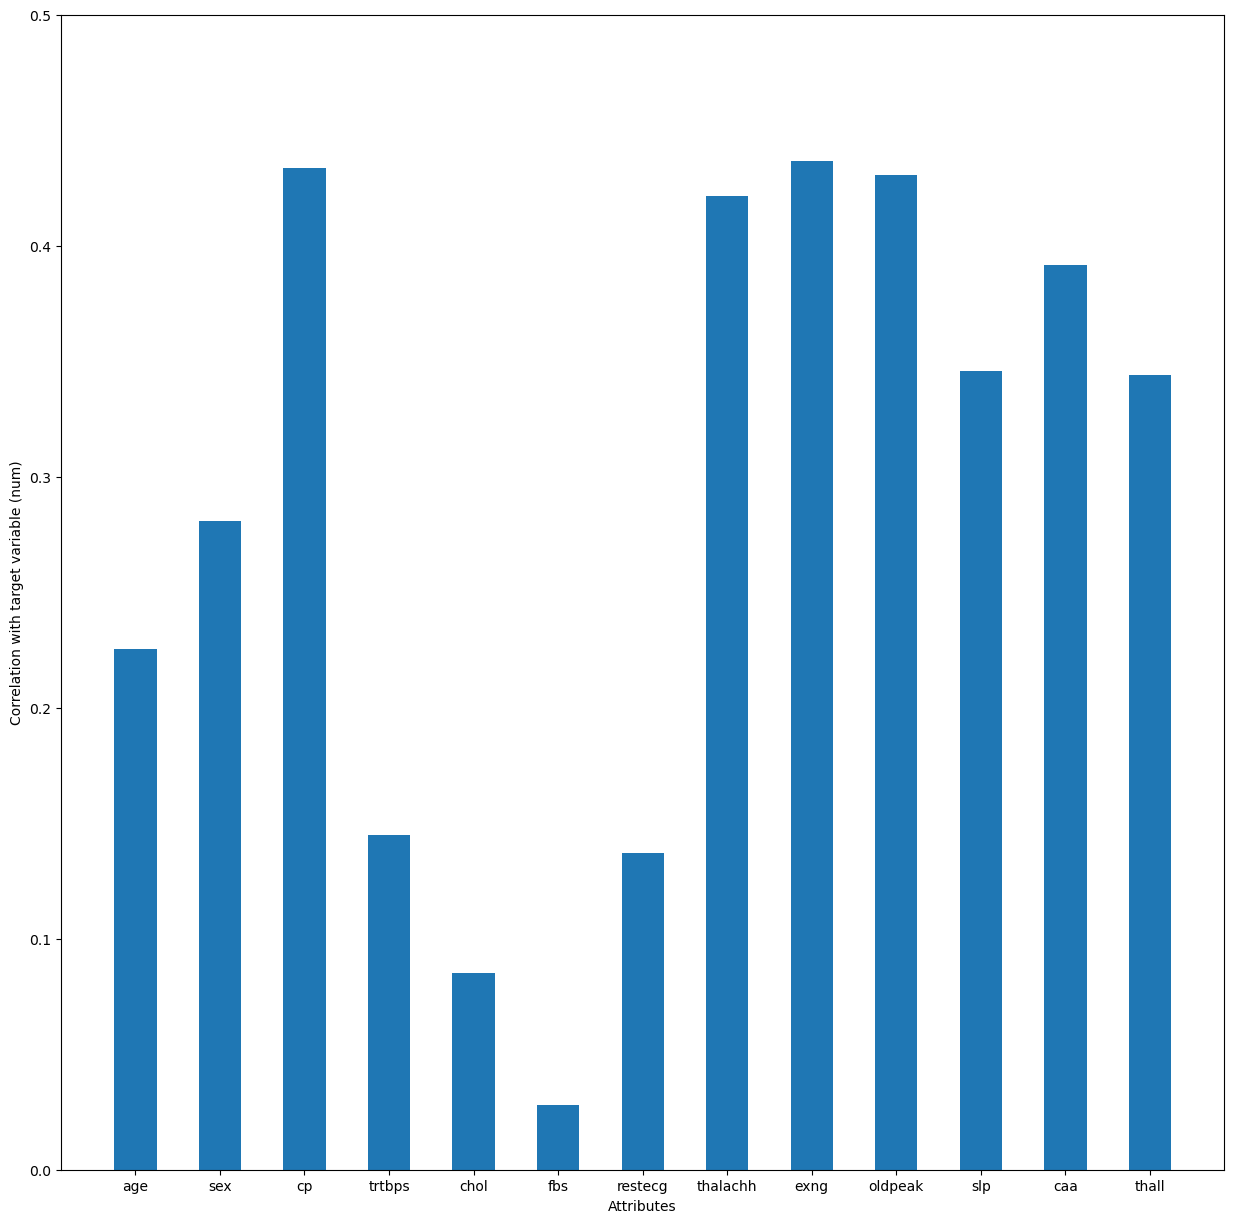

In [24]:
index = np.arange(len(labels)) # Create a numpy array of indices for the x-axis

plt.figure(figsize = (15, 15))
plt.bar(index, corrs, width = 0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with target variable (num)')
plt.xticks(index, labels)
plt.ylim(0, 0.5)

In [25]:
df.drop('fbs', axis = 1, inplace = True)

In [26]:
df.drop('chol', axis = 1, inplace = True)

In [27]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'restecg', 'thalachh', 'exng', 'oldpeak',
       'slp', 'caa', 'thall', 'output'],
      dtype='object')

# Data Split

In [28]:
X = df.drop('output', axis = 1) # # from column 1 to column 11 (Features)
Y = df['output'] # the last column only (Output)

In [29]:
X

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,0,150,0,2.3,0,0,1
1,37,1,2,130,1,187,0,3.5,0,0,2
2,41,0,1,130,0,172,0,1.4,2,0,2
3,56,1,1,120,1,178,0,0.8,2,0,2
4,57,0,0,120,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,1,123,1,0.2,1,0,3
299,45,1,3,110,1,132,0,1.2,1,0,3
300,68,1,0,144,1,141,0,3.4,1,2,3
301,57,1,0,130,1,115,1,1.2,1,1,3


In [30]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 45, shuffle = True)

In [32]:
X_train

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall
145,70,1,1,156,0,143,0,0.0,2,0,2
84,42,0,0,102,0,122,0,0.6,1,0,2
282,59,1,2,126,1,134,0,2.2,1,1,1
89,58,0,0,100,0,122,0,1.0,1,0,2
40,51,0,2,140,0,142,0,1.5,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
163,38,1,2,138,1,173,0,0.0,2,4,2
213,61,0,0,145,0,146,1,1.0,1,0,3
95,53,1,0,142,0,111,1,0.0,2,0,3
32,44,1,1,130,0,188,0,0.0,2,0,2


In [33]:
Y_train

145    1
84     1
282    0
89     1
40     1
      ..
163    1
213    0
95     1
32     1
131    1
Name: output, Length: 212, dtype: int64

In [34]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (212, 11)
X_test shape: (91, 11)
Y_train shape: (212,)
Y_test shape: (91,)


# Use Logistic Regression

In [35]:
model = LogisticRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(accuracy, 2) * 100}%')

Accuracy: 86.0%


D:\Abdulrhman Osama\Anaconda Navigator\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Use Decision Tree

In [36]:
model = DecisionTreeClassifier()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(accuracy, 2) * 100}%')

Accuracy: 69.0%


# Thank You

# Eng. Abdulrhman Osama